In [1]:
import pandas as pd
import numpy as np

In [2]:
from glob import glob

In [3]:
file_list = glob('./test_output/*.txt')

In [5]:
file_list = sorted(file_list)

In [37]:
import pandas as pd
from datetime import datetime

content_list = []
for file in file_list:
    today = file.split('\\')[-1].split('_')[0]
    with open(file, 'r', encoding='UTF-8') as f:
        lines = f.readlines()
        content_dict = {}
        for line in lines[1:46]:
            key, val = line.strip().split(':')
            key = key.strip()
            val = val.strip()

            if val is None or len(val) == 0:
                continue

            if key == '주식체결시간':
                # 주식체결시간이 "HHMMSS" 형태이므로, 이를 datetime으로 변환
                val = today + ' ' + val[:2] + ':' + val[2:4] + ':' + val[4:]
                content_dict.update({key: pd.to_datetime(val, format='%Y%m%d %H:%M:%S')})
            elif key == '거래정지여부':
                content_dict.update({key: str(val)})
            else:
                content_dict.update({key: float(val)})

    content_list.append(content_dict)

# DataFrame 생성 후 주식체결시간을 index로 설정
df = pd.DataFrame(content_list)
df.set_index('주식체결시간', inplace=True)

In [38]:
df

,주식현재가,전일대비부호,전일대비,전일대비율,가중평균주식가격,주식시가,주식최고가,주식최저가,매도호가1,매수호가1,...,거래정지여부,매도호가잔량,매수호가잔량,총매도호가잔량,총매수호가잔량,거래량회전율,전일동시간누적거래량,전일동시간누적거래량비율,시간구분코드,정적VI발동기준가
주식체결시간,,,,,,,,,,,,,,,,,,,,,
2024-10-14 09:51:47,20400.0,2.0,1720.0,9.21,21487.45,21200.0,22100.0,20350.0,20450.0,20400.0,...,N,2131.0,1313.0,27705.0,68484.0,57.13,2633187.0,184.40,0.0,21200.0
2024-10-14 09:51:47,20450.0,2.0,1770.0,9.48,21487.38,21200.0,22100.0,20350.0,20450.0,20400.0,...,N,2131.0,1176.0,27611.0,68317.0,57.13,2633187.0,184.41,0.0,21200.0
2024-10-14 09:51:48,20400.0,2.0,1720.0,9.21,21487.33,21200.0,22100.0,20350.0,20450.0,20400.0,...,N,1987.0,1027.0,27471.0,68689.0,57.14,2633187.0,184.42,0.0,21200.0
2024-10-14 09:51:48,20400.0,2.0,1720.0,9.21,21487.33,21200.0,22100.0,20350.0,20450.0,20400.0,...,N,2298.0,1426.0,27735.0,69225.0,57.14,2633187.0,184.42,0.0,21200.0
2024-10-14 09:51:49,20400.0,2.0,1720.0,9.21,21487.30,21200.0,22100.0,20350.0,20450.0,20400.0,...,N,2301.0,1458.0,27699.0,69363.0,57.14,2633187.0,184.42,0.0,21200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-14 15:59:46,19500.0,2.0,820.0,4.39,21161.11,21200.0,22100.0,19500.0,19500.0,19490.0,...,N,5856.0,1534.0,17959.0,6448.0,105.05,9039356.0,98.77,0.0,21200.0
2024-10-14 15:59:47,19500.0,2.0,820.0,4.39,21161.11,21200.0,22100.0,19500.0,19500.0,19490.0,...,N,5856.0,1534.0,17959.0,6448.0,105.07,9039356.0,98.79,0.0,21200.0
2024-10-14 15:59:48,19500.0,2.0,820.0,4.39,21161.11,21200.0,22100.0,19500.0,19500.0,19490.0,...,N,5856.0,1534.0,17959.0,6448.0,105.09,9039356.0,98.81,0.0,21200.0


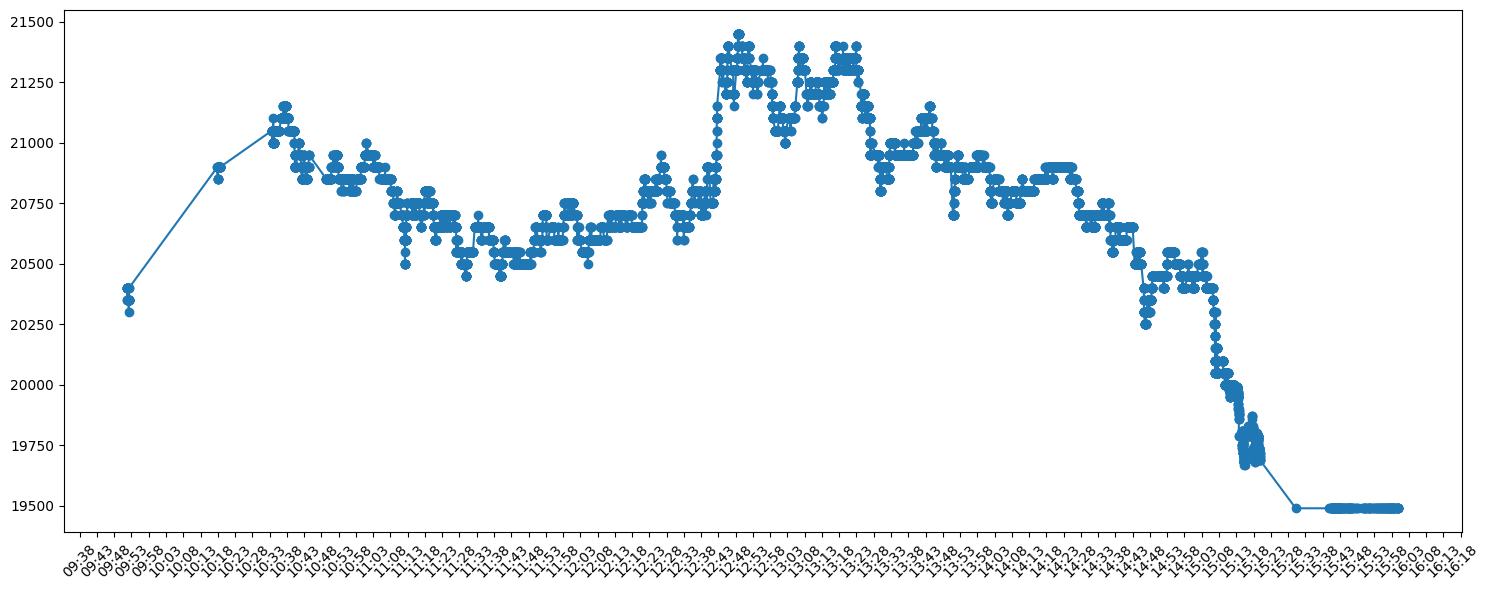

In [67]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))

# 그래프 그리기
plt.plot(df.index, df['매수호가1'], marker='o')


# x축을 분 단위로 설정
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=5))  # 1분 간격으로 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # 시간:분 형식으로 표시

plt.xticks(rotation=45)  # x축 라벨이 겹치지 않게 45도 회전
plt.tight_layout()

plt.show()

In [54]:
df.columns

Index(['주식현재가', '전일대비부호', '전일대비', '전일대비율', '가중평균주식가격', '주식시가', '주식최고가',
       '주식최저가', '매도호가1', '매수호가1', '체결거래량', '누적거래량', '누적거래대금', '매도체결건수',
       '매수체결건수', '순매수체결건수', '체결강도', '총매도수량', '총매수수량', '체결구분', '매수비율',
       '전일거래량대비등락율', '시가시간', '시가대비구분', '시가대비', '최고가시간', '고가대비구분', '고가대비',
       '최저가시간', '저가대비구분', '저가대비', '영업일자', '신장운영구분코드', '거래정지여부', '매도호가잔량',
       '매수호가잔량', '총매도호가잔량', '총매수호가잔량', '거래량회전율', '전일동시간누적거래량', '전일동시간누적거래량비율',
       '시간구분코드', '정적VI발동기준가'],
      dtype='object')

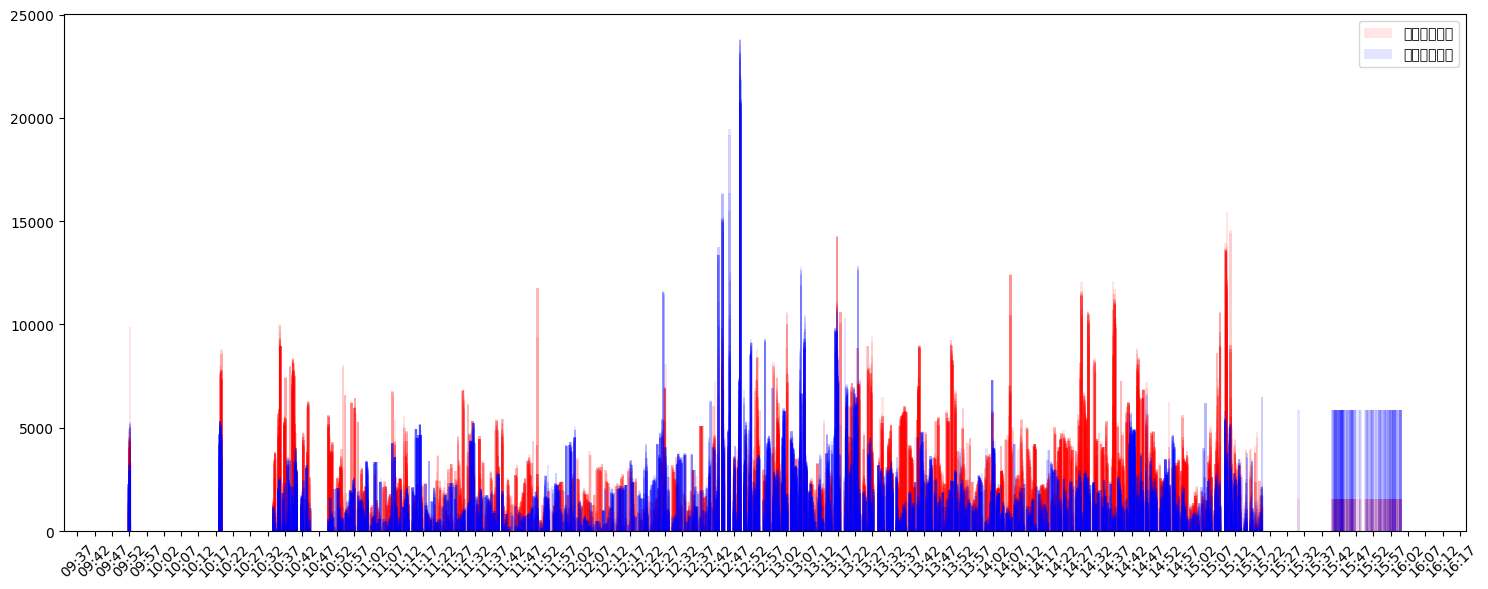

In [75]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
# 그래프 그리기
plt.bar(df.index, df['매수호가잔량'], width=0.0005, color='red', alpha=0.1, label='매수호가잔량')
plt.bar(df.index, df['매도호가잔량'], width=0.0005, color='blue', alpha=0.1, label='매도호가잔량')

# x축을 분 단위로 설정
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=5))  # 1분 간격으로 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # 시간:분 형식으로 표시

plt.xticks(rotation=45)  # x축 라벨이 겹치지 않게 45도 회전
plt.tight_layout()

plt.legend()  # 범례 추가
plt.show()


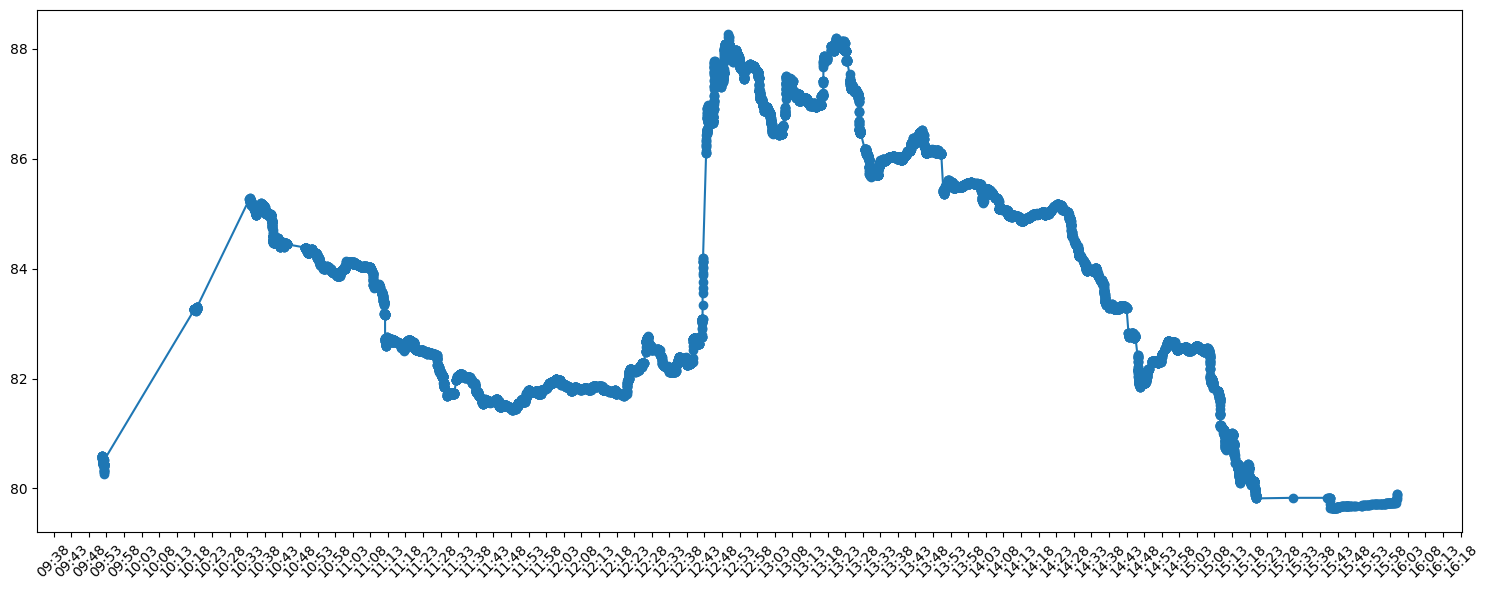

In [77]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))

# 그래프 그리기
# plt.plot(df.index, df['매수비율'], marker='o')
plt.plot(df.index, df['체결강도'], marker='o')

# x축을 분 단위로 설정
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=5))  # 1분 간격으로 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # 시간:분 형식으로 표시

plt.xticks(rotation=45)  # x축 라벨이 겹치지 않게 45도 회전
plt.tight_layout()

plt.show()